<a href="https://colab.research.google.com/github/tanuja5/100daysofmlcode/blob/master/DevangariCharRecg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Uploading dataset
from google.colab import files
uploaded = files.upload()

Saving DevanagariHandwrittenCharacterDataset.zip to DevanagariHandwrittenCharacterDataset.zip


In [0]:
#unzip the train and test folders
import zipfile
zip_ref = zipfile.ZipFile("DevanagariHandwrittenCharacterDataset.zip", 'r')
zip_ref.extractall("sc_images")
zip_ref.close()

In [0]:
#packages required 
import numpy as np
import os
import scipy.ndimage
import matplotlib.pyplot as plt
from skimage import data, color, exposure
from sklearn.model_selection import  train_test_split


In [0]:
features_list = []
features_label = []

# load labeled training / test data
def load(x):
  #path to each folder in training/ test set
  cwd = "sc_images/DevanagariHandwrittenCharacterDataset/" + x
  subfolders = [f.path for f in os.scandir(cwd) if f.is_dir() ] 
  for d in subfolders:
    label = d
    directory = d
    for filename in os.listdir(directory):
        if (filename.endswith('.png')):
            digit_image = scipy.misc.imread(directory +"/"+ filename)
             
            #resize image to load as a vector
            image_resized = digit_image.reshape(1024).astype('float32')
            
            features_list.append(image_resized)
            features_label.append(label)
            
load("Train")

In [0]:
# store features array into a numpy array
features  = np.array(features_list, 'float32')
# split the labled dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features, features_label, test_size=0.2)


In [0]:
#packages required to train and test model accuracy
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [49]:
#fit a Random Forest classifier
clf=RandomForestClassifier()
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [0]:
prediction_validation = clf.predict(X_test)

In [51]:
print("Validation Accuracy: " + str(accuracy_score(y_test,prediction_validation)))

Validation Accuracy: 0.7728260869565218


In [52]:
print("Validation Confusion Matrix: \n" + str(confusion_matrix(y_test,prediction_validation)))

Validation Confusion Matrix: 
[[284   0   0 ...   0   0   0]
 [  0 324   5 ...   0  16   0]
 [  0  21 308 ...   0   0   1]
 ...
 [  0   0   7 ... 317   1   0]
 [  0   8   2 ...   0 303   0]
 [  2   0   1 ...   1   0 313]]


In [53]:
#Looking into one of the predicted values
prediction_validation[3]



'sc_images/DevanagariHandwrittenCharacterDataset/Train/digit_5'

Predicted sc_images/DevanagariHandwrittenCharacterDataset/Train/digit_5


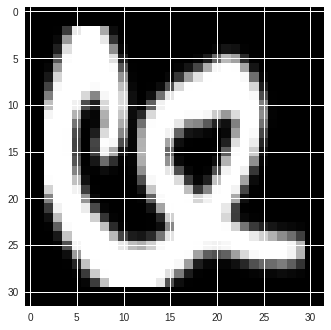

In [54]:
print("Predicted " + str(prediction_validation[3]))
plt.imshow(X_test[3].reshape((32,32)),cmap='gray')

In [92]:
features_list = []
features_label = []

#loading test data

load("Test")



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  


In [0]:
# store features array into a numpy array
features  = np.array(features_list, 'float32')

In [0]:
prediction_test = clf.predict(features)

Predicted sc_images/DevanagariHandwrittenCharacterDataset/Train/digit_3


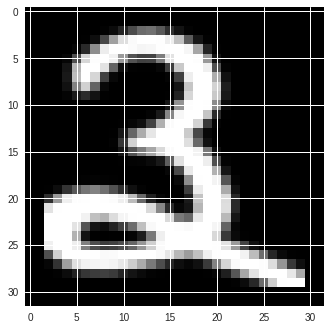

In [86]:
print("Predicted " + str(prediction_test[1200]))
plt.imshow(features[1200].reshape((32,32)),cmap='gray')